# HW3

In [89]:
"""
This is the script for HW3 assignment1
author: Xia Wang
"""
import os
from scipy.optimize import curve_fit, minimize
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline

In [90]:
# 6 distributions: chi-squared, gaussian, binomial, poisson, log-normal and gamma
mydis = {}

In [91]:
# choose mean
myMean = 20

In [92]:
# start with chi-squared
# The degree of freedom of the chi-squred distribution equals the mean
chidf = 20

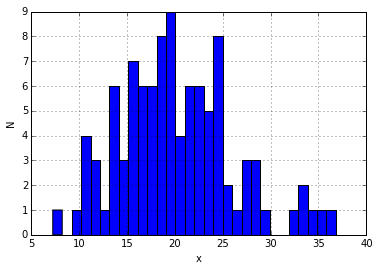

In [93]:
mySeed = np.random.seed(2015)
mySeed
mydis['chisq'] = np.random.chisquare(chidf, size = 100)
plt.hist(mydis['chisq'], bins=30)
plt.xlabel('x')
plt.ylabel('N')
plt.grid()

In [94]:
print 'Chisq Mean is %.2f, standard deviation is %.2f'% (mydis['chisq'].mean(), mydis['chisq'].std())

Chisq Mean is 20.15, standard deviation is 5.95


In [95]:
# make different sample sizes between 10 and 2000
mySize = 2000/(np.array(range(1,100)+[10]))
print mySize, mySize.shape

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  200] (100,)


## Chi-Squared Distribution

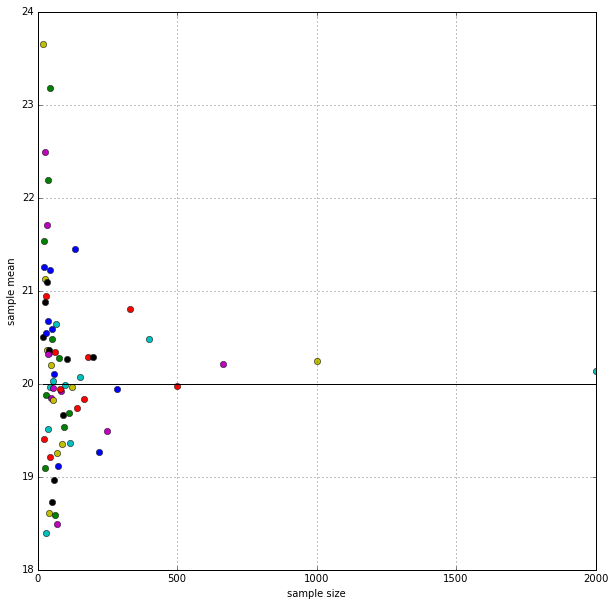

In [96]:
mydis['chisq'] = {}
for n in mySize:
    mySeed
    mydis['chisq'][n] = np.random.chisquare(chidf, size=n)
means = {}
means['chisq'] = {}
myfig = plt.figure(figsize = (10,10))
axchisq = myfig.add_subplot(111)
for chiMeanN in mydis['chisq']:
    means['chisq'][chiMeanN] = mydis['chisq'][chiMeanN].mean()
    axchisq.plot(chiMeanN, means['chisq'][chiMeanN], 'o')
axchisq.set_xlabel('sample size')
axchisq.set_ylabel('sample mean')
axchisq.plot([min(mySize), max(mySize)],[chidf,chidf], 'k')
axchisq.grid()

In [97]:
allmeans = []
for n in means['chisq']:
    allmeans.append(means['chisq'][n])

## Normal Distribution

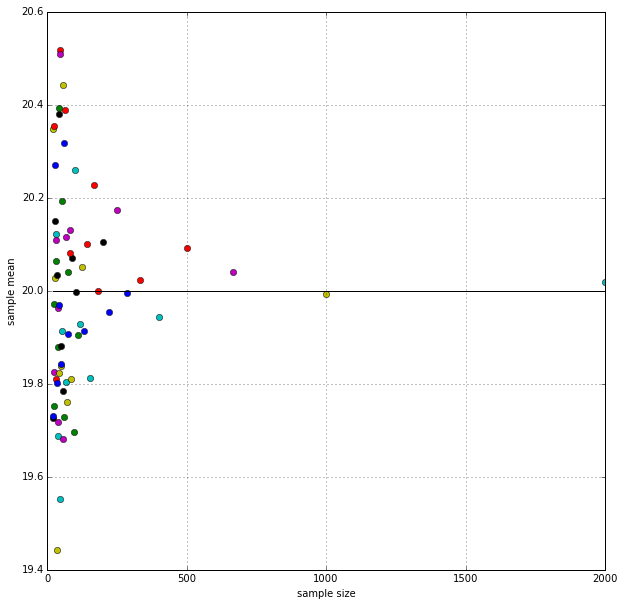

In [98]:
mydis['norm'] = {}
mySigma = 2
for n in mySize:
    mydis['norm'][n] = np.random.normal(myMean, mySigma, size=n)
means['norm'] = {}
myfig = plt.figure(figsize = (10,10))
axnorm = myfig.add_subplot(1,1,1)
for normMeanN in mydis['norm']:
    means['norm'][normMeanN] = mydis['norm'][normMeanN].mean()
    axnorm.plot(normMeanN, means['norm'][normMeanN], 'o')
axnorm.set_xlabel('sample size')
axnorm.set_ylabel('sample mean')
axnorm.plot([min(mySize), max(mySize)],[myMean,myMean], 'k')
axnorm.grid()

In [99]:
for n in means['norm']:
    allmeans.append(means['norm'][n])

## Binomial Distribution

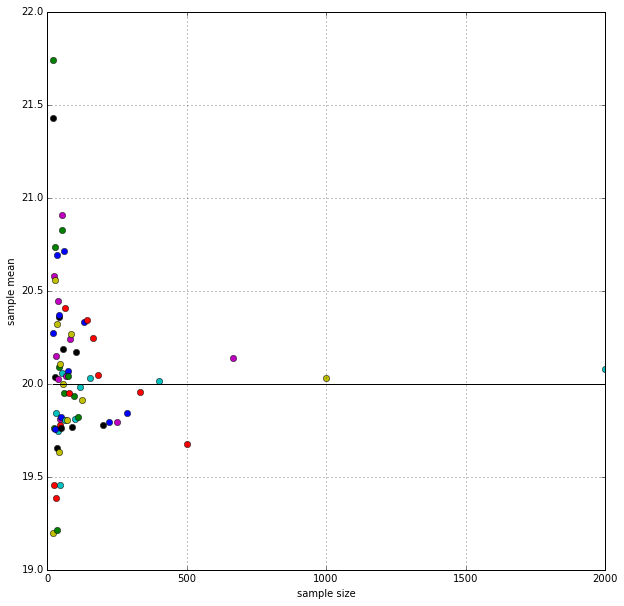

In [100]:
mydis['binomial'] = {}
for n in mySize:
    mySeed
    mydis['binomial'][n] = np.random.binomial(n=40,p=0.5, size=n)
means['binomial'] = {}
myfig = plt.figure(figsize = (10,10))
axbino = myfig.add_subplot(1,1,1)
for binoMeanN in mydis['binomial']:
    means['binomial'][binoMeanN] = mydis['binomial'][binoMeanN].mean()
    axbino.plot(binoMeanN, means['binomial'][binoMeanN], 'o')
axbino.set_xlabel('sample size')
axbino.set_ylabel('sample mean')
axbino.plot([min(mySize), max(mySize)],[myMean,myMean], 'k')
axbino.grid()

In [101]:
for n in means['binomial']:
    allmeans.append(means['binomial'][n])

## Poisson Distribution

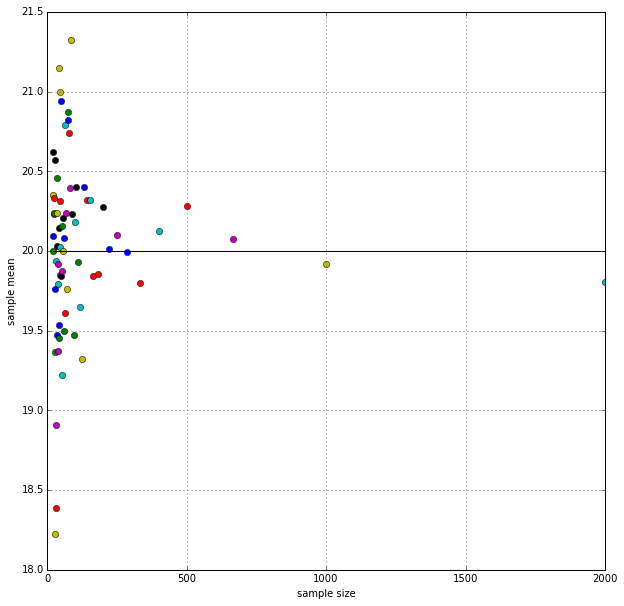

In [102]:
mydis['poisson'] = {}
myLamda = myMean
for n in mySize:
    mySeed
    mydis['poisson'][n] = np.random.poisson(lam=myLamda, size=n)
means['poisson'] = {}
myfig = plt.figure(figsize = (10,10))
axpoi = myfig.add_subplot(1,1,1)
for poiMeanN in mydis['poisson']:
    means['poisson'][poiMeanN] = mydis['poisson'][poiMeanN].mean()
    axpoi.plot(poiMeanN, means['poisson'][poiMeanN], 'o')
axpoi.set_xlabel('sample size')
axpoi.set_ylabel('sample mean')
axpoi.plot([min(mySize), max(mySize)],[myMean,myMean], 'k')
axpoi.grid()

In [103]:
for n in means['poisson']:
    allmeans.append(means['poisson'][n])

## Log-Normal Distribution

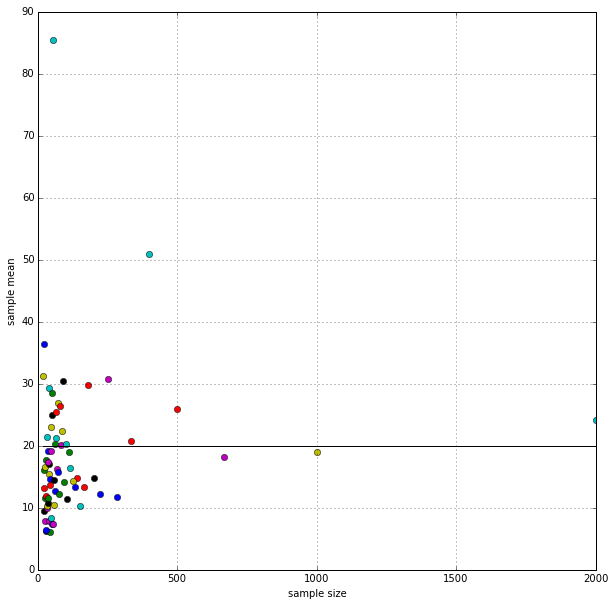

In [104]:
mydis['log'] = {}
for n in mySize:
    mySeed
    mydis['log'][n] = np.random.lognormal(mean=(math.log(20) - math.pow(mySigma,2)/2),
                                          sigma=mySigma, size=n)
means['log'] = {}
myfig = plt.figure(figsize = (10,10))
axlog = myfig.add_subplot(1,1,1)
for logMeanN in mydis['log']:
    means['log'][logMeanN] = mydis['log'][logMeanN].mean()
    axlog.plot(logMeanN, means['log'][logMeanN], 'o')
axlog.set_xlabel('sample size')
axlog.set_ylabel('sample mean')
axlog.plot([min(mySize), max(mySize)],[myMean,myMean], 'k')
axlog.grid()

In [105]:
for n in means['log']:
    allmeans.append(means['log'][n])

## Gamma Distribution

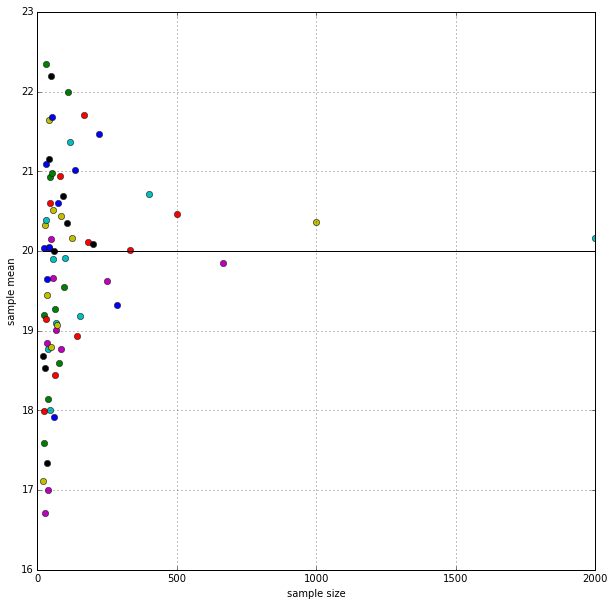

In [106]:
mydis['gamma'] = {}
for n in mySize:
    mySeed
    mydis['gamma'][n] = np.random.gamma(shape=4,scale=5,size=n)
means['gamma'] = {}
myfig = plt.figure(figsize = (10,10))
axgamma = myfig.add_subplot(1,1,1)
for gammaMeanN in mydis['gamma']:
    means['gamma'][gammaMeanN] = mydis['gamma'][gammaMeanN].mean()
    axgamma.plot(gammaMeanN, means['gamma'][gammaMeanN], 'o')
axgamma.set_xlabel('sample size')
axgamma.set_ylabel('sample mean')
axgamma.plot([min(mySize), max(mySize)],[myMean,myMean], 'k')
axgamma.grid()

In [110]:
for n in means['gamma']:
    allmeans.append(means['gamma'][n])

## Behavior of the plots: for all types of distributions of different sample sizes, the closer is the distance to the mean, the higher is the quatity of data points. We expect this kind of behavior because of Central Limit Theorem.

## Distribution of Means

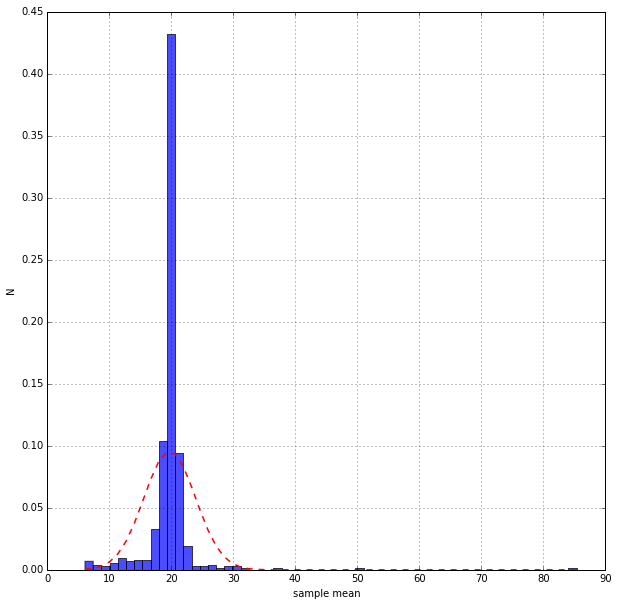

In [122]:
plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(allmeans, 60, alpha = 0.7, normed = 1)
(mu, sigma) = norm.fit(allmeans)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth = 1.5)
plt.xlabel('sample mean')
plt.ylabel('N')
plt.grid()